In [1]:
from datetime import datetime
import matplotlib.pyplot as pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 定数
TEST_SIZE = 0.2
RANDOM_STATE = 123
MIN_SAMPLES_LEAF = 3

% matplotlib inline

In [2]:
# 診察予約を行った患者が当日に現れるかを記録したCSVファイルを取り込む
import_df = pd.read_csv('KaggleV2-May-2016.csv')
import_df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [3]:
# CSVファイルの確認
print('Total: {}件'.format(len(import_df.index)))
no_show_count = import_df['No-show'].value_counts()
print('Show: {}人 ({:.2%})'.format(no_show_count[0], no_show_count[0] / len(import_df.index)))
print('No-Show: {}人 ({:.2%})'.format(no_show_count[1], no_show_count[1] / len(import_df.index)))

Total: 110527件
Show: 88208人 (79.81%)
No-Show: 22319人 (20.19%)


In [4]:
# ◆ 1回目：数値データだけで学習
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# 説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'Age':]
# 目的変数を設定
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 79.99%
テストスコア: 79.44%


予想内訳:
         No-Show予想  Show予想
No-Show         39    4489
Show            55   17523


No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


In [5]:
# ◆ 2回目：文字データを数値に変換して追加
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# 説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

# -----------------------------------------------------------------------------------------------
training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))
# -----------------------------------------------------------------------------------------------

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'Age':]
# 目的変数を設定
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 86.93%
テストスコア: 79.24%


予想内訳:
         No-Show予想  Show予想
No-Show        496    4032
Show           557   17021


No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


In [6]:
# ◆ 3回目：有効になりそうな項目を追加
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# 説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
training_df['Diabetes'] = import_df['Diabetes']
training_df['Alcoholism'] = import_df['Alcoholism']
training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))

# -----------------------------------------------------------------------------------------------
training_df['ScheduledWeekDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['AppointmentWeekDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['DiffDays'] = import_df[['AppointmentDay', 'ScheduledDay']].apply(
    lambda x: (datetime.strptime(x[0][: 10], "%Y-%m-%d") - datetime.strptime(x[1][: 10], "%Y-%m-%d")).days, axis=1
)
# -----------------------------------------------------------------------------------------------

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'Age':]
# 目的変数を設定
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('2回目予想')
print('No-Show 予想率/正解率: 4.76%/47.10%\nShow 予想率/正解率: 95.24%/80.85%')
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 87.76%
テストスコア: 79.06%


予想内訳:
         No-Show予想  Show予想
No-Show        584    3944
Show           686   16892


No-Show 予想率/正解率: 5.75%/45.98%
Show 予想率/正解率: 94.25%/81.07%


2回目予想
No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%


([<matplotlib.axis.YTick at 0x14ba1a90>,
 <a list of 14 Text yticklabel objects>)

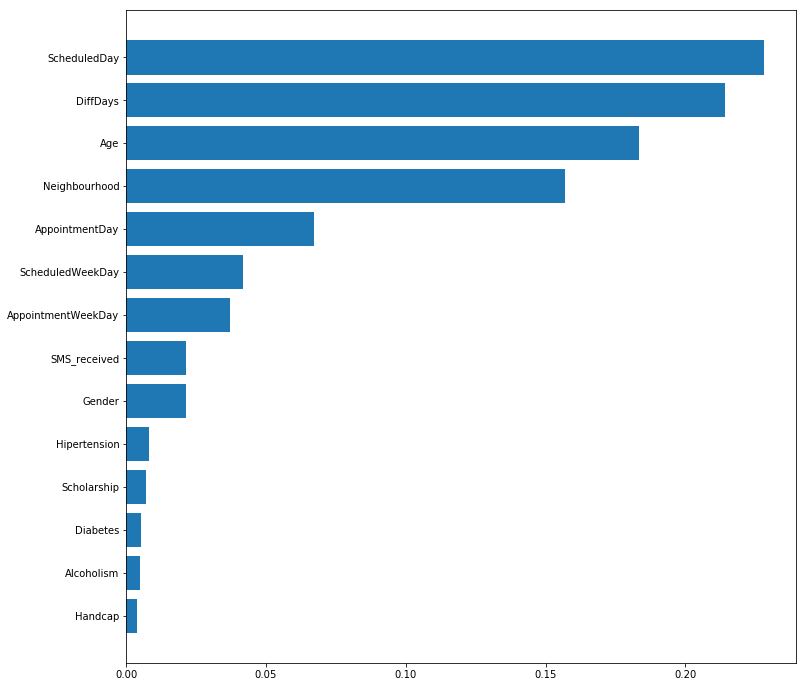

In [7]:
# 作成してモデルの相関度が高い項目を表示
values, names = zip(*sorted(zip(rfc.feature_importances_, feature.columns)))

pyplot.figure(figsize=(12, 12))
pyplot.barh(range(len(names)), values, align='center')
pyplot.yticks(range(len(names)), names)

In [8]:
# ◆ 4回目：相関の低い項目を削除
# 学習・テストデータの作成
training_df = pd.DataFrame()

# 目的変数の設定
training_df['No-show'] = import_df['No-show'].apply(lambda s: 1 if s == 'No' else 0)

# 説明変数の設定
training_df['Age'] = import_df['Age']
training_df['Scholarship'] = import_df['Scholarship']
training_df['Hipertension'] = import_df['Hipertension']
# training_df['Diabetes'] = import_df['Diabetes']
# training_df['Alcoholism'] = import_df['Alcoholism']
# training_df['Handcap'] = import_df['Handcap']
training_df['SMS_received'] = import_df['SMS_received']

training_df['Gender'] = import_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
training_df['ScheduledDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
training_df['AppointmentDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ").timestamp())
neighbourhoods = []
for name in import_df['Neighbourhood'].drop_duplicates():
    if name not in neighbourhoods:
        neighbourhoods.append(name)
training_df['Neighbourhood'] = import_df['Neighbourhood'].apply(lambda s: neighbourhoods.index(s))

training_df['ScheduledWeekDay'] = import_df['ScheduledDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['AppointmentWeekDay'] = import_df['AppointmentDay'].apply(
    lambda s: datetime.strptime(s[: 10], "%Y-%m-%d").weekday())
training_df['DiffDays'] = import_df[['AppointmentDay', 'ScheduledDay']].apply(
    lambda x: (datetime.strptime(x[0][: 10], "%Y-%m-%d") - datetime.strptime(x[1][: 10], "%Y-%m-%d")).days, axis=1
)

# トレーニング設定
# 説明変数の範囲を設定
feature = training_df.ix[:, 'Age':]
# 目的変数を設定
correct = training_df['No-show']

# 学習データとテストデータの分離
training_feature, test_feature, traininig_correct, test_correct = train_test_split(
    feature, correct, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# ランダムフォレストの作成
rfc = RandomForestClassifier(min_samples_leaf=MIN_SAMPLES_LEAF, random_state=RANDOM_STATE)
rfc.fit(training_feature, traininig_correct)

# 評価
total_cnt = len(training_feature) + len(test_feature)
print('学習: {}件 ({:.2%})'.format(len(training_feature), len(training_feature) / total_cnt))
print('テスト: {}件 ({:.2%})'.format(len(test_feature), len(test_feature) / total_cnt))
print('\n')
print('学習スコア: {:.2%}'.format(rfc.score(training_feature, traininig_correct)))
print('テストスコア: {:.2%}'.format(rfc.score(test_feature, test_correct)))
print('\n')
result = confusion_matrix(test_correct, rfc.predict(test_feature))
print('予想内訳:\n{}'.format(pd.DataFrame(data=result, index=['No-Show', 'Show'], columns=['No-Show予想', 'Show予想'])))
print('\n')
print('No-Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 0] + result[1, 0]) / len(test_feature),
    result[0, 0] / (result[0, 0] + result[1, 0])))
print('Show 予想率/正解率: {:.2%}/{:.2%}'.format(
    (result[0, 1] + result[1, 1]) / len(test_feature),
    result[1, 1] / (result[0, 1] + result[1, 1])))
print('\n')
print('3回目予想')
print('No-Show 予想率/正解率: 5.75%/45.98%\nShow 予想率/正解率: 94.25%/81.07%')
print('\n')
print('2回目予想')
print('No-Show 予想率/正解率: 4.76%/47.10%\nShow 予想率/正解率: 95.24%/80.85%')
print('\n')
print('1回目予想')
print('No-Show 予想率/正解率: 0.43%/41.49%\nShow 予想率/正解率: 99.57%/79.61%')

学習: 88421件 (80.00%)
テスト: 22106件 (20.00%)


学習スコア: 89.27%
テストスコア: 79.22%


予想内訳:
         No-Show予想  Show予想
No-Show        712    3816
Show           777   16801


No-Show 予想率/正解率: 6.74%/47.82%
Show 予想率/正解率: 93.26%/81.49%


3回目予想
No-Show 予想率/正解率: 5.75%/45.98%
Show 予想率/正解率: 94.25%/81.07%


2回目予想
No-Show 予想率/正解率: 4.76%/47.10%
Show 予想率/正解率: 95.24%/80.85%


1回目予想
No-Show 予想率/正解率: 0.43%/41.49%
Show 予想率/正解率: 99.57%/79.61%
